<a href="https://colab.research.google.com/github/LDONoronha/MVP_analise_exploratoria_de_dados/blob/main/MVPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USAR MACHINE LEARNING PARA DESCOBRIR PESSOAS COM TRAÇOS DE PERSONALIDADE SEMELHANTES**

*   Abertura para experiências (inventivo/curioso vs. consistente/cauteloso)
*   Conscienciosidade (eficiente/organizado vs. despreocupado/descuidado)
*   Extroversão (sociável/energético vs. solitário/reservado)
*   Amabilidade (amigável/compassivo vs. desafiador/desapegado)
*   Neuroticismo (sensível/nervoso vs. seguro/confiante)




**1) Definição do Problema**

Objetivo: Descobrir traços de personalidade semelhantes

A partir de uma base de dados detectar traços de personalidade semelhantes por meio do agrupamento de dados.

O teste realizado consiste em cinquenta itens com 5 alternativas.

Link do dataset https://www.kaggle.com/datasets/tunguz/big-five-personality-test?resource=download

**2) Preparação de Dados**

In [41]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

## Carga do Dataset


In [5]:
# url a importar
url_dados = 'https://raw.githubusercontent.com/LDONoronha/MVP_analise_exploratoria_de_dados/main/data-final.csv'


In [23]:
# carga dos dados
df = pd.read_csv(url_dados, delimiter=',')

In [24]:
# visualizando o dataset
df.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768,1024,9,234,6,1,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360,768,12,179,11,1,MY,3.1698,101706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366,768,3,186,7,1,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920,1200,186,219,7,1,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366,768,8,315,17,2,KE,1.0,38.0


In [9]:
# excluindo atributos irrelevantes
df.drop(df.columns[50:110], axis = 1, inplace = True)

In [10]:
# verificando os dados
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


In [13]:
# Analisando estatisticas da base de dados
pd.options.display.float_format = "{:.2f}".format
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,...,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00,59999.00
mean,2.67,2.79,3.31,3.15,3.26,2.47,2.80,3.42,3.01,3.58,...,3.61,2.14,3.98,2.08,3.74,1.93,3.95,3.13,4.07,3.90
std,1.25,1.32,1.20,1.23,1.27,1.24,1.39,1.27,1.34,1.30,...,1.14,1.11,1.10,1.09,0.99,1.11,1.00,1.23,1.05,1.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,4.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [12]:
# verificando a contagem dos registros por valor
df["EXT1"].value_counts()

EXT1
3    17769
1    14192
4    11691
2    11512
5     4626
0      209
Name: count, dtype: int64

In [62]:
#selecionando o total de registros com o valor zero
df[(df == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Check for string columns
string_columns = df.select_dtypes(include="object").columns

# Remove string columns from the comparison
df = df.drop(string_columns, axis=1)

# Perform the comparison again
df = df[(df > 0.00).all(axis=1)]

In [67]:
# verificando a contagem de registros por valor
df["EXT1"].value_counts()

EXT1
3    15086
1    12102
4    10081
2    10079
5     3802
Name: count, dtype: int64

## Separação em conjunto de treino e conjunto de teste

In [68]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:8] # atributos
y = array[:,8] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem e Inferência






### Criação e avaliação de modelos: linha base

LR: MSE 1.02 (0.03) - RMSE 1.01
Ridge: MSE 1.02 (0.03) - RMSE 1.01
Lasso: MSE 1.74 (0.02) - RMSE 1.32
KNN: MSE 1.17 (0.02) - RMSE 1.08
CART: MSE 1.68 (0.04) - RMSE 1.30


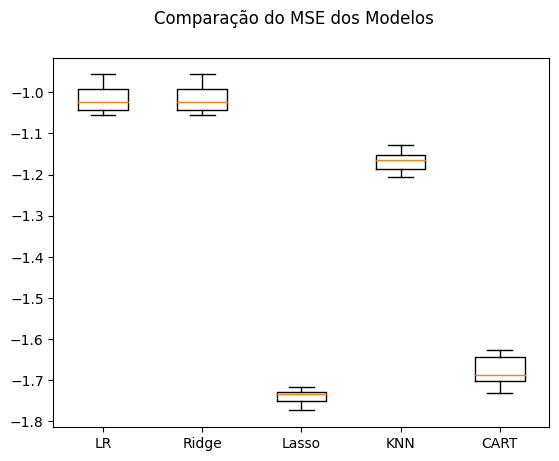

In [70]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [71]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1.02
RMSE 1.01


### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.408 (0.007)
CART-orig: 0.387 (0.008)
NB-orig: 0.415 (0.006)
KNN-padr: 0.405 (0.006)
CART-padr: 0.386 (0.009)
NB-padr: 0.415 (0.006)
KNN-norm: 0.408 (0.007)
CART-norm: 0.386 (0.008)
NB-norm: 0.415 (0.006)


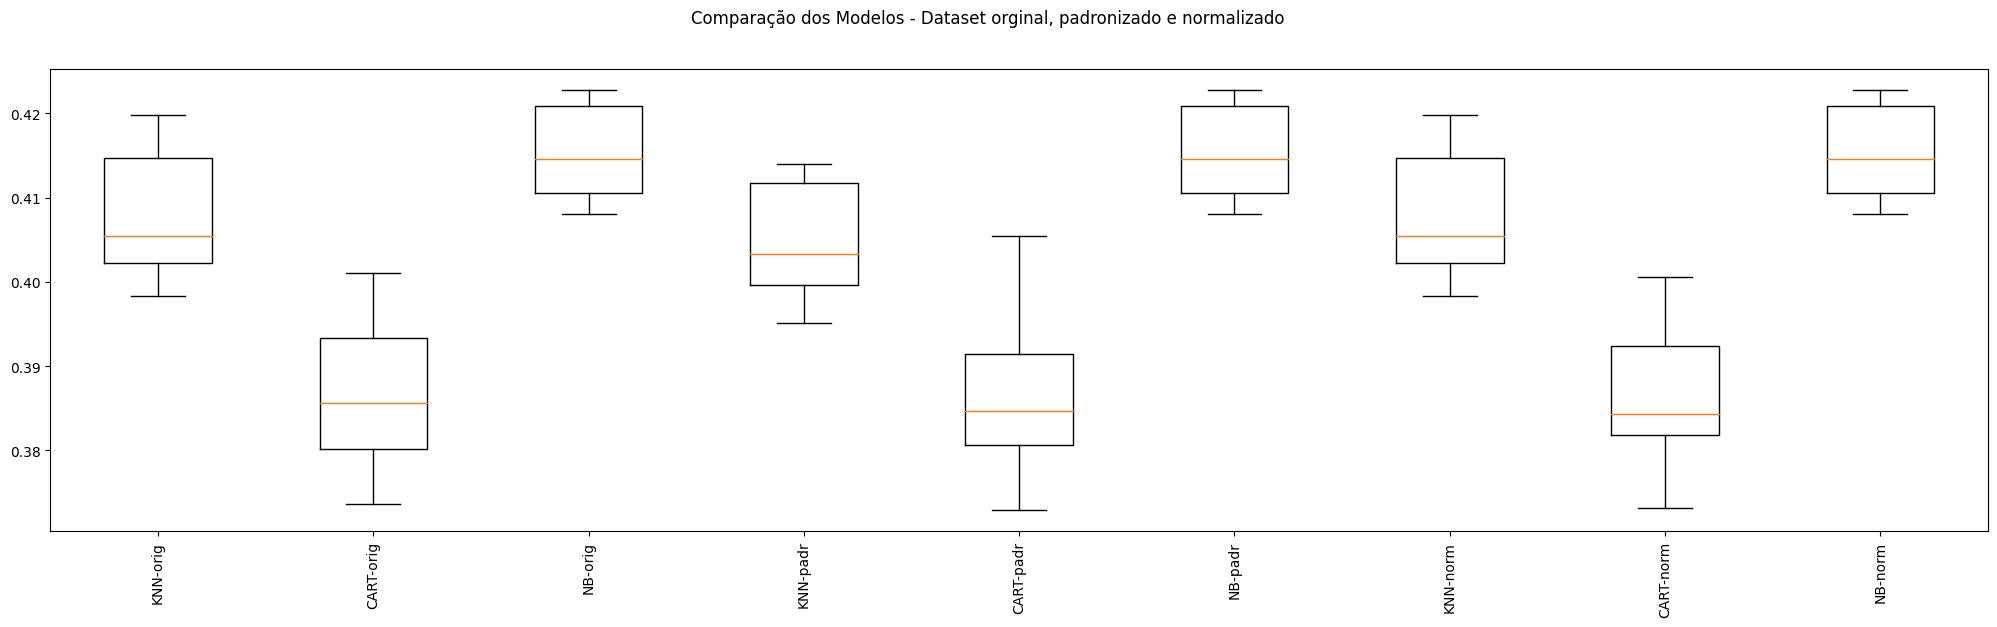

In [73]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))


# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))


# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))


# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [74]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.445235 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.446359 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.445235 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}


## Finalização do Modelo

In [75]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.43167155425219944


In [76]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos



In [91]:
# Novos dados - não sabemos a classe!
data = {'EXIT1':  [6, 10, 12],
        'EXIT2': [12, 23, 49],
        'EXIT3': [23, 8, 9],
        'EXIT4': [9, 8, 10],
        'OPN1': [8, 11, 9],
        'OPN2': [7, 8, 9],
        'OPN3': [13, 12, 7],
        'OPN4': [1, 8, 7],
        }

atributos = ['EXIT1', 'EXIT2', 'EXIT3', 'EXIT4', 'OPN1', 'OPN2', 'OPN3', 'OPN4']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 2.68545798  7.04190631 16.76099619  4.83585708  3.84373942  3.70229887
   7.46354345 -1.97525574]
 [ 5.91657333 15.47289992  3.9831556   4.00604927  6.29031055  4.52191267
   6.73097542  3.68330056]
 [ 7.532131   35.400703    4.83501164  5.66566488  4.65926313  5.34152646
   3.06813527  2.87493537]]


In [92]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[5 5 3]
